In [1]:
""" Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the 
closing stock price of a corporation (Apple Inc.) using the past 60 day stock price."""

' Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the \nclosing stock price of a corporation (Apple Inc.) using the past 60 day stock price.'

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using TensorFlow backend.


In [5]:
#Get the stock quote 
df = web.DataReader('SAIL.NS', data_source='yahoo', start='2012-01-01', end='2020-08-07')
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,82.750000,79.699997,81.900002,81.599998,13544155.0,71.759651
2012-01-03,84.000000,82.000000,82.000000,83.750000,12150550.0,73.650383
2012-01-04,86.500000,84.500000,85.150002,85.150002,21466340.0,74.881561
2012-01-05,85.800003,83.599998,85.000000,83.949997,9795545.0,73.826263
2012-01-06,84.900002,82.099998,83.500000,84.300003,11979130.0,74.134064
...,...,...,...,...,...,...
2020-08-03,34.750000,33.599998,33.799999,34.349998,29156107.0,34.349998
2020-08-04,35.000000,34.299999,34.549999,34.599998,19087784.0,34.599998
2020-08-05,37.400002,35.049999,35.099998,36.750000,81716003.0,36.750000


In [6]:
df.shape

(2115, 6)

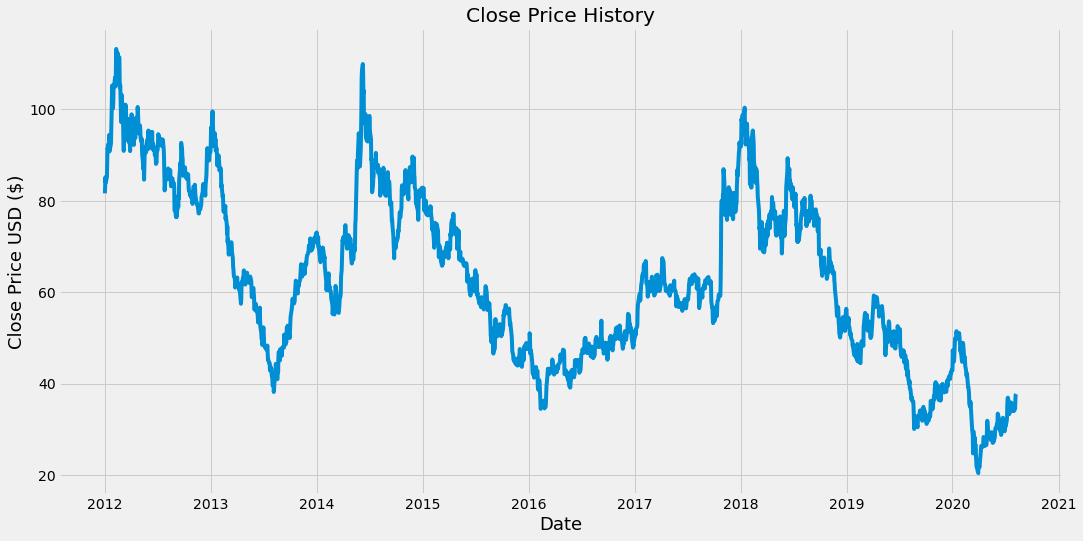

In [7]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [8]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [15]:
training_data_len

1692

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [14]:
len(scaled_data)

2115

In [11]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]

In [13]:
len(train_data)

1692

In [7]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
#     x_train.append(train_data[i-60:i,0])
#     y_train.append(train_data[i,0])
    print(train_data[i-60:i,0])
    print(train_data[i,0])

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/3
1632/1632 [==============================] - 32s 20ms/step - loss: 0.0027
Epoch 2/3
1632/1632 [==============================] - 31s 19ms/step - loss: 9.9111e-04
Epoch 3/3
1632/1632 [==============================] - 32s 19ms/step - loss: 7.3549e-04


In [13]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo sc

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.5968429863772489

C:\Users\varun\anaconda3\envs\tensor_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


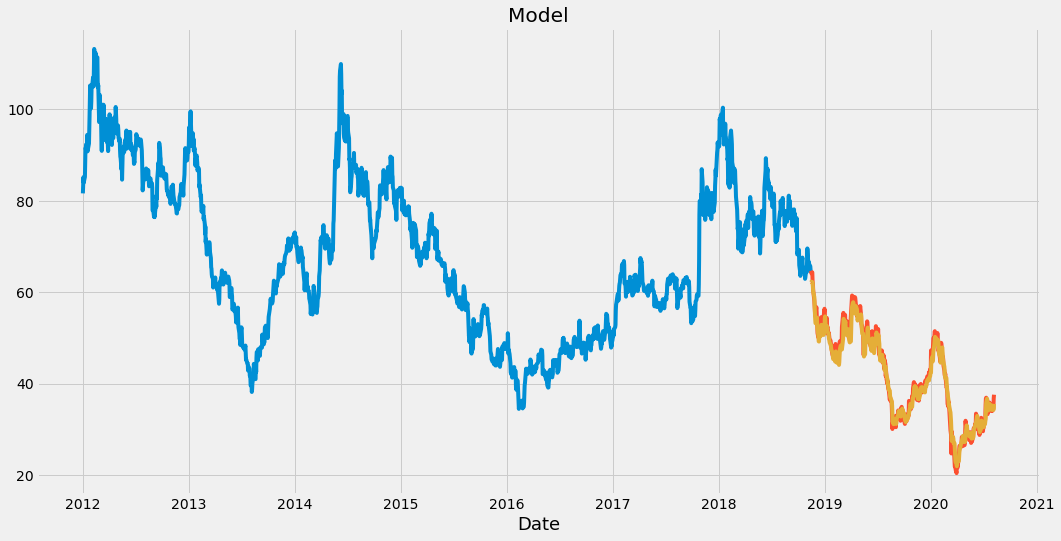

In [20]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-11-15,64.650002,62.168659
2018-11-16,64.099998,62.288925
2018-11-19,64.300003,62.078224
2018-11-20,62.400002,62.132572
2018-11-21,61.900002,60.940907
...,...,...
2020-07-31,34.000000,34.745605
2020-08-03,34.349998,34.298386
2020-08-04,34.599998,34.226643
